In [1]:
import seaborn as sns
import spacy
import nltk
from nltk import bigrams
#from nltk.corpus import stopwords
import pandas as pd
import itertools
import collections
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tweets = pd.read_pickle("March.pkl")
tweets = tweets.head(50)

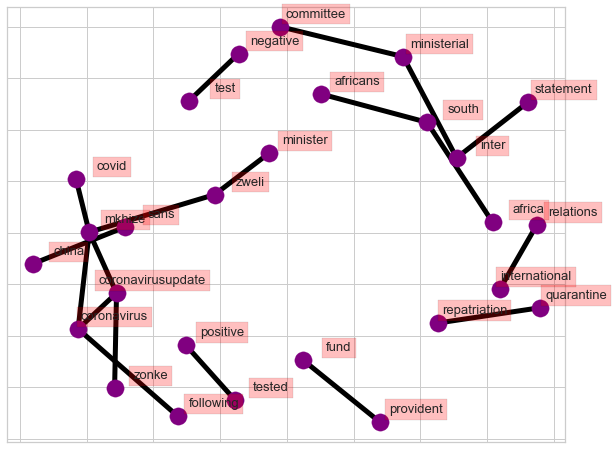

In [13]:
#https://www.earthdatascience.org
#/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/
terms_bigram = [list(bigrams(t)) for t in tweets['tokenised']]
bigram = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigram)
# create a 
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("China", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=7,
                 width=5,
                 edge_color='black',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [14]:
nlp = spacy.load("en_core_web_sm")

<AxesSubplot:>

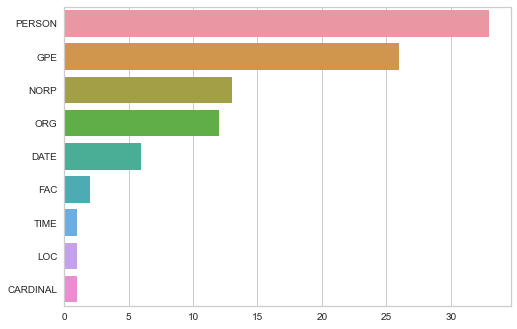

In [15]:
def ner(text):
    temp = ""
    for i in text:
        temp += i +" "
    doc = nlp(temp)
    return [X.label_ for X in doc.ents]

ent = tweets['tokenised'].apply(lambda x : ner(x))
ent = [x for sub in ent for x in sub]
counter = Counter(ent)

count = counter.most_common()
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

In [16]:
word_list = [] 
for i in tweets['tokenised']:
    for j in i:
        word_list.append(j)
word_list = pd.DataFrame(word_list)

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


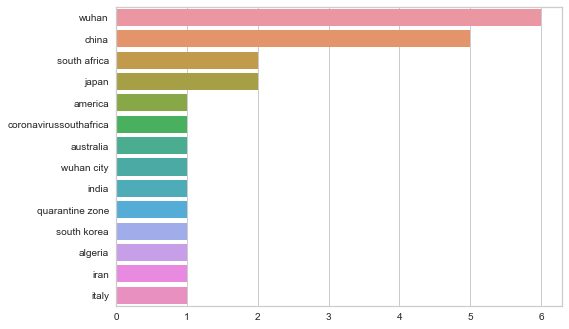

In [17]:
def display(ents):
    def get_ner_per_tweet_tk(text,ent=ents):
        temp = ""
        for i in text:
            temp += i +" "
        doc = nlp(temp)
        return [X.text for X in doc.ents if X.label_ == ent]

    gpe = word_list.apply(lambda x: get_ner_per_tweet_tk(x))
    gpe = [x for x in gpe[0]]
    counter = Counter(gpe)
    x,y = map(list,zip(*counter.most_common(20)))
    sns.barplot(y,x)
    
#display("PERSON") 
display("GPE")
# we will need to fidn a new way to clean as this is not returning a usefull result 

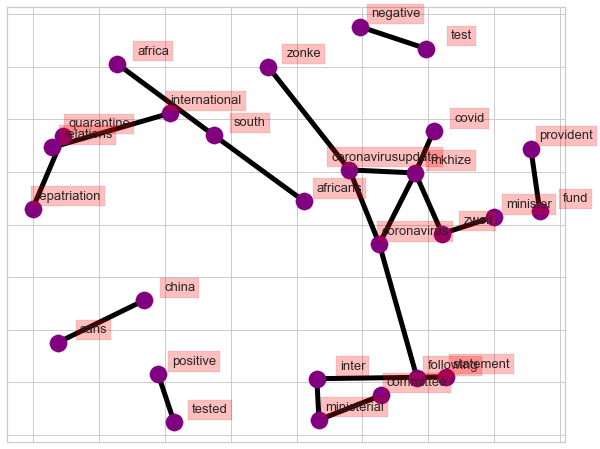

In [18]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=7,
                 width=5,
                 edge_color='black',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [19]:
# TFIDF


from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
print(X.shape)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)


In [32]:

#tfidf.vocabulary_

# from yellowbrick.text import TSNEVisualizer
# from matplotlib.axes._axes import _log as matplotlib_axes_logger

# matplotlib_axes_logger.setLevel('ERROR')

# corpus = word_list[0][0:60]
# tfidf = TfidfVectorizer()

# X = tfidf.fit_transform(corpus)
# y = corpus

# # Create the visualizer and draw the vectors
# tsne = TSNEVisualizer()
# tsne.fit(X, y)
# tsne.show()

In [47]:
# we have put this on hold.. Not sure what this is good for.
# def dummy_fun(doc):
#     return doc

# tfidf = TfidfVectorizer(
#     analyzer='word',
#     tokenizer=dummy_fun,
#     preprocessor=dummy_fun,
#     token_pattern=None) 

# tfidf.fit([word_list[0]])

# from scipy import stats
# from numpy import array

# data = tfidf

# density = stats.kde.gaussian_kde(data)

# x = np.arange(0, 8, 0.1)

# plt.scatter(x, density(x))

In [ ]:
# dude